In [47]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [49]:
# accessing the data from google drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# reading the data and also checking the computation time 
%time df=pd.read_csv('/content/drive/MyDrive/data/FEATURES.csv.csv')

CPU times: user 6.47 ms, sys: 1.03 ms, total: 7.49 ms
Wall time: 14.2 ms


In [51]:
# lets check the type of data
type(df)

pandas.core.frame.DataFrame

In [52]:
# lets also check the shape of the dataset
print(df.shape)

(498, 15)


In [53]:
# lets check the column names present in the data 
df.columns

Index(['Image', 'Contrast', 'Correlation', 'Energy', 'Homogeneity', 'Entropy',
       'Mean', 'Standard Deviation', 'RMS', 'Variance', 'Smoothness',
       'Kurtosis', 'Skewness', 'IDM', 'Class'],
      dtype='object')

In [54]:
# lets check the first 5 rows and columns
pd.set_option('max_columns',20)
df.head()

,Image,Contrast,Correlation,Energy,Homogeneity,Entropy,Mean,Standard Deviation,RMS,Variance,Smoothness,Kurtosis,Skewness,IDM,Class
0,1486,0.023973,0.987613,0.778035,0.990596,1.858199,13.686527,35.529134,5.187867,1133.952896,1.000000,8.226414,2.554144,255,1
1,4123,0.140067,0.796922,0.795569,0.971266,1.952135,8.105663,22.130185,5.727804,432.005210,1.000000,36.205856,4.928847,255,0
2,3249,0.086748,0.620577,0.930107,0.985542,1.640281,4.367668,13.873736,4.681365,175.090166,0.999999,76.116047,6.977644,255,0
3,1567,0.035615,0.988123,0.642330,0.984974,2.748758,23.469933,44.205872,7.200492,1697.650258,1.000000,3.933581,1.611915,255,1
4,3746,0.122409,0.763633,0.813315,0.973467,2.015589,7.687420,19.800688,6.164754,354.649031,1.000000,37.905350,4.876235,255,0


In [55]:
# lets describe the data for the numerical columns
pd.set_option('max_columns',20)
df.iloc[:,:7].describe().style.background_gradient(cmap='magma')

,Image,Contrast,Correlation,Energy,Homogeneity,Entropy,Mean
count,498.000000,498.000000,494.000000,498.000000,498.000000,498.000000,498.000000
mean,2228.654618,0.095886,0.804602,0.774118,0.981165,1.713327,16.266651
std,1310.878745,0.056455,0.206561,0.176964,0.011286,1.027370,17.381287
min,14.000000,0.000000,0.154393,0.312876,0.938605,0.000000,0.000000
25%,1112.250000,0.044322,0.700706,0.633090,0.973453,0.913168,3.120407
50%,2184.500000,0.096120,0.883898,0.814457,0.981137,1.857818,7.720829
75%,3335.500000,0.132373,0.980325,0.934816,0.990730,2.296073,26.410130
max,4566.000000,0.340455,0.994730,1.000000,1.000000,4.876460,106.249126


In [56]:
# lets describe the data for the numerical columns
pd.set_option('max_columns',20)
df.iloc[:,7:15].describe().style.background_gradient(cmap='cividis')

,Standard Deviation,RMS,Variance,Smoothness,Kurtosis,Skewness,IDM,Class
count,498.000000,498.000000,498.000000,498.000000,494.000000,494.000000,498.000000,498.000000
mean,34.589655,4.968934,1535.693556,0.991966,117.548911,6.560241,252.757028,0.668675
std,24.655352,2.526555,1840.724477,0.089351,268.476265,6.947484,22.986813,0.471163
min,0.000000,0.000000,0.000000,0.000000,1.261354,0.303425,0.000000,0.000000
25%,14.400803,2.999239,196.095287,0.999999,6.462103,2.134085,255.000000,0.000000
50%,22.081371,5.313507,435.986499,1.000000,35.753173,4.853291,255.000000,1.000000
75%,55.439964,6.588025,2566.308469,1.000000,75.721589,7.041158,255.000000,1.000000
max,113.368673,11.229183,10996.812440,1.000000,3366.629355,53.707200,255.000000,1.000000


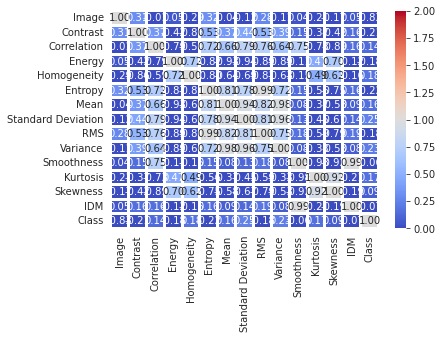

In [58]:
sns.heatmap(df.corr(),fmt='0.2f',vmin=0,vmax=2,linewidths=2,annot=True,cmap='coolwarm')

In [59]:
df.isnull().sum()

Image                 0
Contrast              0
Correlation           4
Energy                0
Homogeneity           0
Entropy               0
Mean                  0
Standard Deviation    0
RMS                   0
Variance              0
Smoothness            0
Kurtosis              4
Skewness              4
IDM                   0
Class                 0
dtype: int64

In [60]:
# filling the missing values for the continuous variables for proper data visualisation
df.dropna(axis=0,how='any',inplace=True)

In [61]:
df.isnull().sum()

Image                 0
Contrast              0
Correlation           0
Energy                0
Homogeneity           0
Entropy               0
Mean                  0
Standard Deviation    0
RMS                   0
Variance              0
Smoothness            0
Kurtosis              0
Skewness              0
IDM                   0
Class                 0
dtype: int64

In [62]:
df.shape

(494, 15)

In [63]:
# lets check whether the data still has any missing values
df.isnull().sum().sum()

0

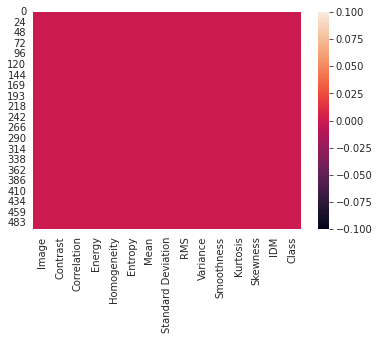

In [64]:
#lets check
sns.heatmap(df.isna())

In [65]:
#checking the unique values in the data
df.nunique()

Image                 494
Contrast              481
Correlation           490
Energy                490
Homogeneity           490
Entropy               490
Mean                  490
Standard Deviation    490
RMS                   490
Variance              490
Smoothness            362
Kurtosis              490
Skewness              490
IDM                     3
Class                   2
dtype: int64

In [66]:
# Get the count of cancerous and non-cancerous
df['Class'].value_counts()
df['Class'].head()

0    1
1    0
2    0
3    1
4    0
Name: Class, dtype: int64

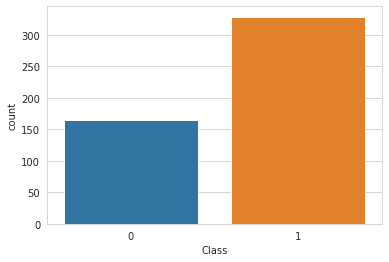

In [67]:
# Visualize the count
sns.countplot(df['Class'], label = 'Count')

In [68]:
# Look at the datatypes 
df.dtypes

Image                   int64
Contrast              float64
Correlation           float64
Energy                float64
Homogeneity           float64
Entropy               float64
Mean                  float64
Standard Deviation    float64
RMS                   float64
Variance              float64
Smoothness            float64
Kurtosis              float64
Skewness              float64
IDM                     int64
Class                   int64
dtype: object

,Image,Contrast,Correlation,Energy,Homogeneity,Entropy,Mean,Standard Deviation,RMS,Variance,Smoothness,Kurtosis,Skewness,IDM,Class
0,1486,0.023973,0.987613,0.778035,0.990596,1.858199,13.686527,35.529134,5.187867,1133.952896,1.000000,8.226414,2.554144,255,1
1,4123,0.140067,0.796922,0.795569,0.971266,1.952135,8.105663,22.130185,5.727804,432.005210,1.000000,36.205856,4.928847,255,0
2,3249,0.086748,0.620577,0.930107,0.985542,1.640281,4.367668,13.873736,4.681365,175.090166,0.999999,76.116047,6.977644,255,0
3,1567,0.035615,0.988123,0.642330,0.984974,2.748758,23.469933,44.205872,7.200492,1697.650258,1.000000,3.933581,1.611915,255,1
4,3746,0.122409,0.763633,0.813315,0.973467,2.015589,7.687420,19.800688,6.164754,354.649031,1.000000,37.905350,4.876235,255,0


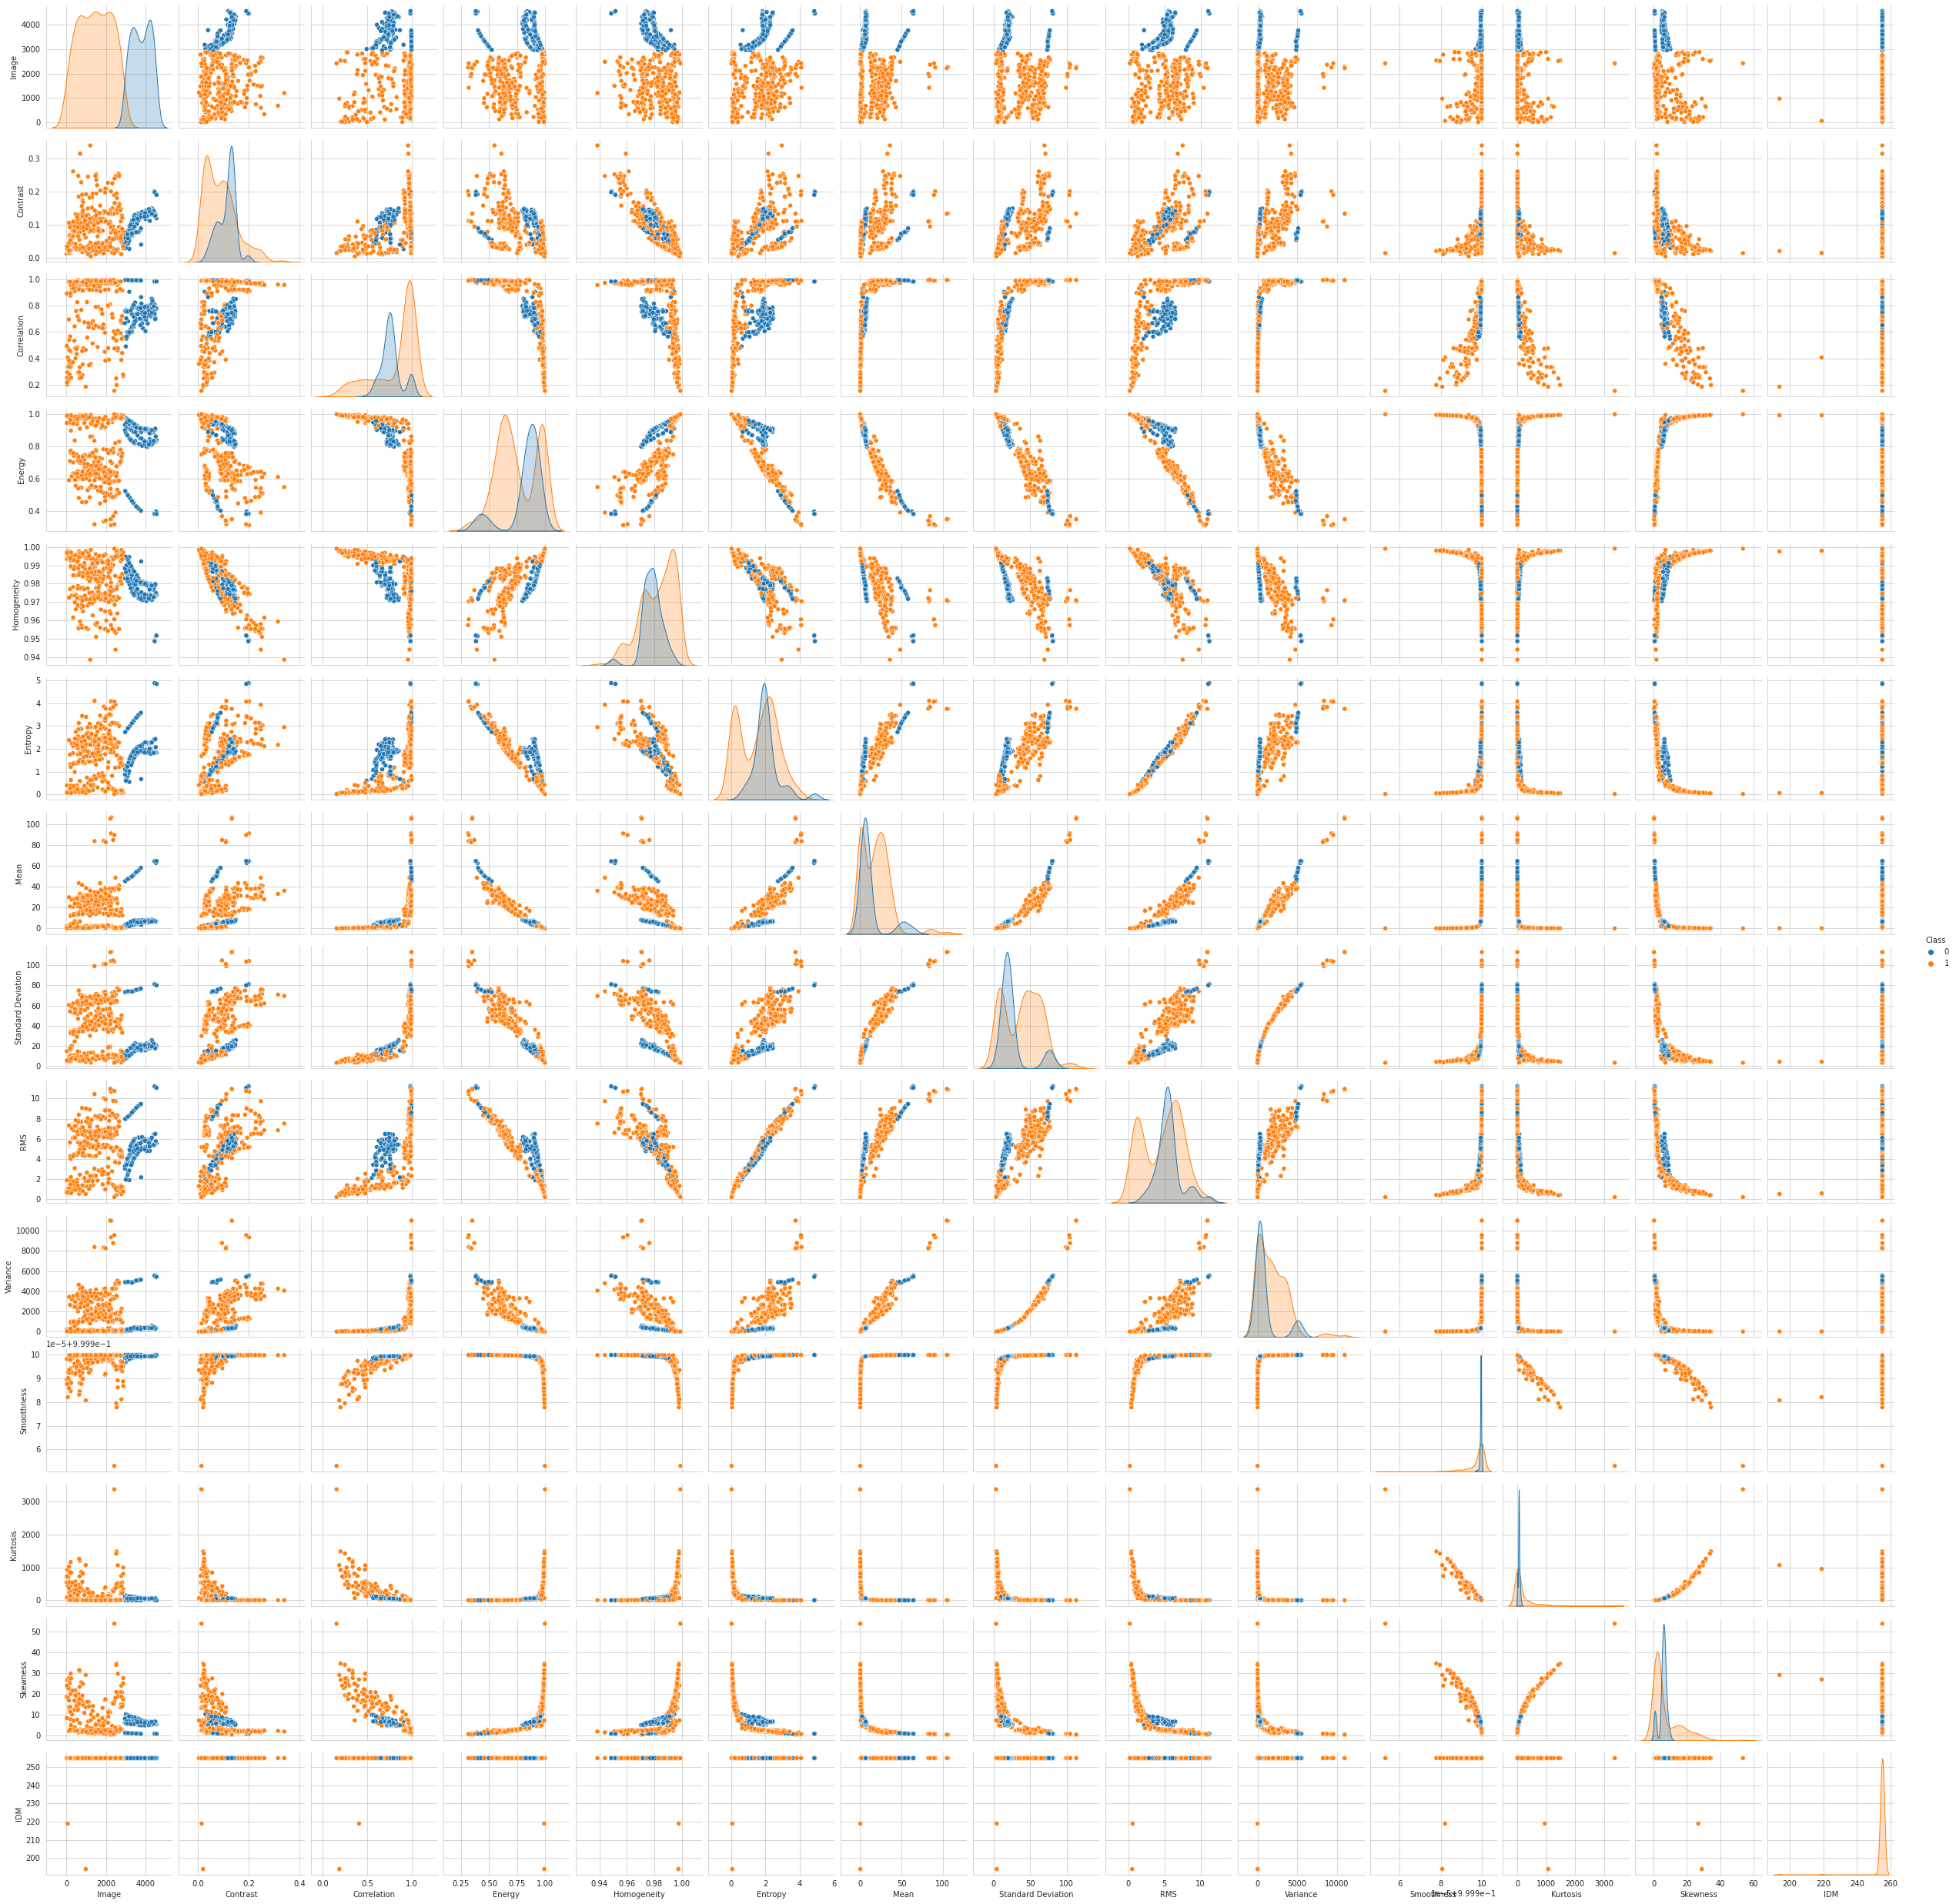

In [69]:
#Create a pair plot
sns.pairplot(df, hue = 'Class')
df.head(5)

In [70]:
# Get the correlation of the columns
df.corr()

,Image,Contrast,Correlation,Energy,Homogeneity,Entropy,Mean,Standard Deviation,RMS,Variance,Smoothness,Kurtosis,Skewness,IDM,Class
Image,1.000000,0.306046,-0.011913,0.059443,-0.284504,0.319576,-0.043715,-0.124091,0.276511,-0.113426,0.251737,-0.208194,-0.172658,0.075232,-0.834871
Contrast,0.306046,1.000000,0.365996,-0.412530,-0.855571,0.516626,0.359444,0.430275,0.519468,0.381335,0.417679,-0.370521,-0.416658,0.087397,-0.200564
Correlation,-0.011913,0.365996,1.000000,-0.790087,-0.594704,0.718084,0.663923,0.794290,0.757804,0.641495,0.754974,-0.734677,-0.886396,0.160642,0.141524
Energy,0.059443,-0.412530,-0.790087,1.000000,0.714104,-0.865144,-0.932571,-0.941004,-0.890745,-0.885305,-0.480076,0.467721,0.702157,-0.076683,-0.190831
Homogeneity,-0.284504,-0.855571,-0.594704,0.714104,1.000000,-0.800004,-0.633202,-0.687659,-0.801728,-0.626517,-0.519068,0.485024,0.620489,-0.092023,0.174648
Entropy,0.319576,0.516626,0.718084,-0.865144,-0.800004,1.000000,0.806697,0.776781,0.989407,0.720333,0.592491,-0.561630,-0.751219,0.101045,-0.214427
Mean,-0.043715,0.359444,0.663923,-0.932571,-0.633202,0.806697,1.000000,0.941526,0.822371,0.975082,0.375308,-0.365766,-0.577196,0.057549,0.165685
Standard Deviation,-0.124091,0.430275,0.794290,-0.941004,-0.687659,0.776781,0.941526,1.000000,0.808462,0.958284,0.466945,-0.451275,-0.668490,0.077198,0.262681
RMS,0.276511,0.519468,0.757804,-0.890745,-0.801728,0.989407,0.822371,0.808462,1.000000,0.746286,0.623763,-0.593227,-0.786347,0.109984,-0.175746
Variance,-0.113426,0.381335,0.641495,-0.885305,-0.626517,0.720333,0.975082,0.958284,0.746286,1.000000,0.339753,-0.331579,-0.531356,0.051324,0.232700


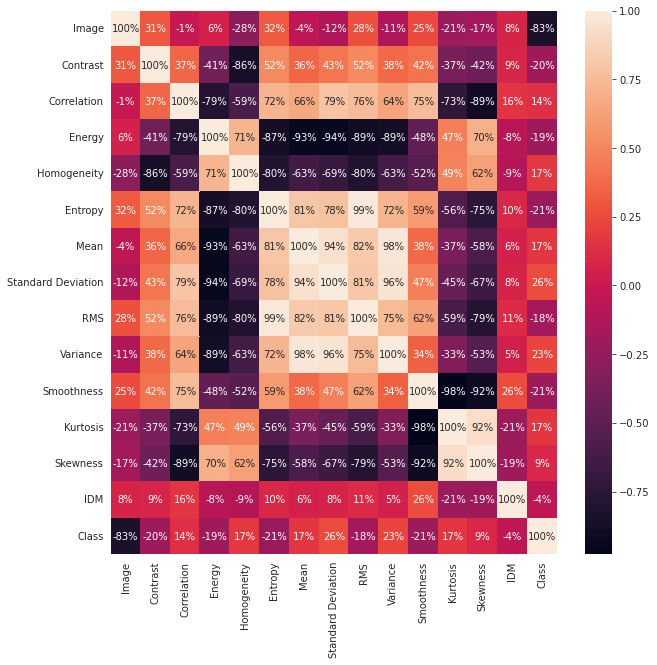

In [71]:
# Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')

In [72]:
#Split the dataset into independent(X) and dependent column (Y) dataset
X=df.iloc[:,:-1].values

In [73]:
X

array([[1.48600000e+03, 2.39726030e-02, 9.87612751e-01, ...,
        8.22641437e+00, 2.55414382e+00, 2.55000000e+02],
       [4.12300000e+03, 1.40066964e-01, 7.96921764e-01, ...,
        3.62058564e+01, 4.92884701e+00, 2.55000000e+02],
       [3.24900000e+03, 8.67477980e-02, 6.20576997e-01, ...,
        7.61160470e+01, 6.97764427e+00, 2.55000000e+02],
       ...,
       [1.14400000e+03, 2.70456210e-02, 3.48966124e-01, ...,
        2.28287310e+02, 1.39328976e+01, 2.55000000e+02],
       [2.74200000e+03, 5.89759660e-02, 9.82380753e-01, ...,
        1.25978233e+01, 3.13394673e+00, 2.55000000e+02],
       [5.67000000e+02, 9.23128670e-02, 7.19068669e-01, ...,
        1.64127010e+02, 1.21545347e+01, 2.55000000e+02]])

In [74]:
Y=df.iloc[:,-1:].values

In [75]:
Y

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

In [76]:
#Split the dataset into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [77]:
#Scale the data (Feature Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [78]:
# Create a function for models
def models(X_train, Y_train):

  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train, Y_train)

  #Random Forrest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)

  #Support Vector Machine(linear)
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Support Vector Machine(radial_basis_function [RBF])
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Naive Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #K_Nearest Neighbours Classifier
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric= 'minkowski', p = 2)
  knn.fit(X_train, Y_train)


  #Print the given models accuracy on the training data
  print('[0]Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
  print('[1]Decision Tree Classifier Training Accuracy: ', tree.score(X_train, Y_train))
  print('[2]Random Forest Classifier Training Accuracy: ', forest.score(X_train, Y_train))
  print('[3]Support Vector Machine (Linear) Training Accuracy: ', svc_lin.score(X_train, Y_train))
  print('[4]Support Vector Machine (radial_basis_function) Training Accuracy: ', svc_rbf.score(X_train, Y_train))
  print('[5]Naive  Bayes Training Accuracy: ', gauss.score(X_train, Y_train))
  print('[6]K_Nearest Neighbors Classifier Training Accuracy: ', knn.score(X_train, Y_train))

  return log, tree, forest, svc_lin, svc_rbf, gauss, knn

model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy:  1.0
[1]Decision Tree Classifier Training Accuracy:  1.0
[2]Random Forest Classifier Training Accuracy:  1.0
[3]Support Vector Machine (Linear) Training Accuracy:  1.0
[4]Support Vector Machine (radial_basis_function) Training Accuracy:  0.9942028985507246
[5]Naive  Bayes Training Accuracy:  0.7884057971014493
[6]K_Nearest Neighbors Classifier Training Accuracy:  0.9971014492753624


In [79]:
#test model accuracy of test data on confusion matrix
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  print('Model', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy = ', (TP + TN)/ (TP + TN + FN + FP))
  print()


from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
  print('Model', i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
  print('Model', i)
  print(classification_report(Y_test, model[i].predict(X_test)))
  print(accuracy_score(Y_test, model[i].predict(X_test)))
  print()


Model 0
[[55  4]
 [ 0 90]]
Testing Accuracy =  0.9731543624161074

Model 1
[[49 10]
 [ 0 90]]
Testing Accuracy =  0.9328859060402684

Model 2
[[51  8]
 [ 0 90]]
Testing Accuracy =  0.9463087248322147

Model 3
[[58  1]
 [ 0 90]]
Testing Accuracy =  0.9932885906040269

Model 4
[[54  5]
 [ 0 90]]
Testing Accuracy =  0.9664429530201343

Model 5
[[ 0 59]
 [ 0 90]]
Testing Accuracy =  0.6040268456375839

Model 6
[[56  3]
 [ 0 90]]
Testing Accuracy =  0.9798657718120806

Model 0
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        59
           1       0.96      1.00      0.98        90

    accuracy                           0.97       149
   macro avg       0.98      0.97      0.97       149
weighted avg       0.97      0.97      0.97       149

0.9731543624161074

Model 1
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        59
           1       0.90      1.00      0.95        90

    